In [ ]:
def draw_topology(carla_topology, index):
    """ Draws traffic signs and the roads network with sidewalks, parking and shoulders by generating waypoints"""
    topology = [x[index] for x in carla_topology]
    topology = sorted(topology, key=lambda w: w.transform.location.z)
    set_waypoints = []
    for waypoint in topology:
        waypoints = [waypoint]

        # Generate waypoints of a road id. Stop when road id differs
        nxt = waypoint.next(1)
        if len(nxt) > 0:
            nxt = nxt[0]
            while nxt.road_id == waypoint.road_id:
                waypoints.append(nxt)
                nxt = nxt.next(1)
                if len(nxt) > 0:
                    nxt = nxt[0]
                else:
                    break
        set_waypoints.append(waypoints)

    return set_waypoints

In [ ]:
import carla
import matplotlib.pyplot as plt

client = carla.Client('localhost', 2000)
client.set_timeout(10.0)
world = client.load_world('Town01')
carla_map = world.get_map()

In [18]:
carla_topology = carla_map.get_topology()
print(carla_topology)

[(<carla.libcarla.Waypoint object at 0x000001DACE5860F0>, <carla.libcarla.Waypoint object at 0x000001DAD07C4210>), (<carla.libcarla.Waypoint object at 0x000001DAD07C4570>, <carla.libcarla.Waypoint object at 0x000001DAD07C4150>), (<carla.libcarla.Waypoint object at 0x000001DAD07C4CF0>, <carla.libcarla.Waypoint object at 0x000001DAD07C43F0>), (<carla.libcarla.Waypoint object at 0x000001DAD07C4990>, <carla.libcarla.Waypoint object at 0x000001DAD07C42D0>), (<carla.libcarla.Waypoint object at 0x000001DAD07C4270>, <carla.libcarla.Waypoint object at 0x000001DAD07C41B0>), (<carla.libcarla.Waypoint object at 0x000001DAD089A690>, <carla.libcarla.Waypoint object at 0x000001DACD324E70>), (<carla.libcarla.Waypoint object at 0x000001DACD324AB0>, <carla.libcarla.Waypoint object at 0x000001DACD3248D0>), (<carla.libcarla.Waypoint object at 0x000001DACD324930>, <carla.libcarla.Waypoint object at 0x000001DACD324090>), (<carla.libcarla.Waypoint object at 0x000001DACD324450>, <carla.libcarla.Waypoint objec

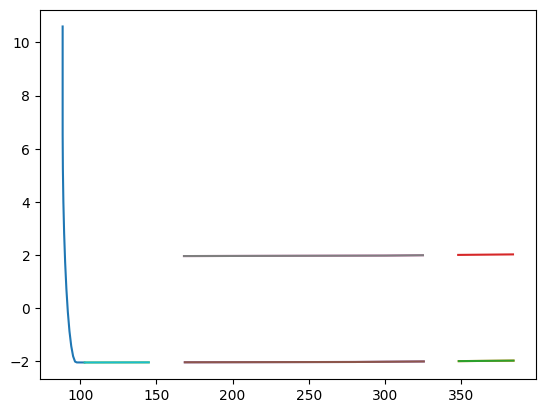

In [16]:
set_waypoints = draw_topology(carla_topology, 0)
for waypoints in set_waypoints[:10]:
    wp_x = [x.transform.location.x for x in waypoints]
    wp_y = [x.transform.location.y for x in waypoints]
    plt.plot(wp_x, wp_y)    

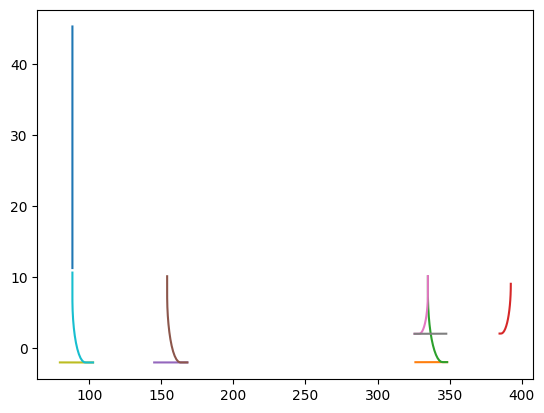

In [17]:
set_waypoints = draw_topology(carla_topology, 1)
for waypoints in set_waypoints[:10]:
    wp_x = [x.transform.location.x for x in waypoints]
    wp_y = [x.transform.location.y for x in waypoints]
    plt.plot(wp_x, wp_y)    